In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
# List available devices
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set TensorFlow to use only the first GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        print(f"Using GPU: {gpus[0].name}")
    except RuntimeError as e:
        print(e)

Using GPU: /physical_device:GPU:0


In [4]:
import pandas as pd

file_path = 'city_hour.csv'
df = pd.read_csv(file_path)

df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


(        City             Datetime  PM2.5  PM10    NO    NO2    NOx  NH3    CO  \
 0  Ahmedabad  2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00   
 1  Ahmedabad  2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   
 2  Ahmedabad  2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   
 3  Ahmedabad  2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   
 4  Ahmedabad  2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   
 
       SO2      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
 0  122.07     NaN      0.0      0.0     0.0  NaN        NaN  
 1   85.90     NaN      0.0      0.0     0.0  NaN        NaN  
 2   52.83     NaN      0.0      0.0     0.0  NaN        NaN  
 3   39.53  153.58      0.0      0.0     0.0  NaN        NaN  
 4   32.63     NaN      0.0      0.0     0.0  NaN        NaN  ,
 None)

In [5]:

df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

df.fillna(method='ffill', inplace=True)

df_cleaned = df.drop(columns=['City', 'AQI_Bucket'])

df_cleaned.isnull().sum(), df_cleaned.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_5272\3366820665.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


(PM2.5        665
 PM10       38274
 NO             0
 NO2            0
 NOx            0
 NH3        48192
 CO             0
 SO2            0
 O3             3
 Benzene        0
 Toluene        0
 Xylene         0
 AQI          680
 dtype: int64,
                      PM2.5  PM10    NO    NO2    NOx  NH3    CO     SO2  \
 Datetime                                                                  
 2015-01-01 01:00:00    NaN   NaN  1.00  40.01  36.37  NaN  1.00  122.07   
 2015-01-01 02:00:00    NaN   NaN  0.02  27.75  19.73  NaN  0.02   85.90   
 2015-01-01 03:00:00    NaN   NaN  0.08  19.32  11.08  NaN  0.08   52.83   
 2015-01-01 04:00:00    NaN   NaN  0.30  16.45   9.20  NaN  0.30   39.53   
 2015-01-01 05:00:00    NaN   NaN  0.12  14.90   7.85  NaN  0.12   32.63   
 
                          O3  Benzene  Toluene  Xylene  AQI  
 Datetime                                                    
 2015-01-01 01:00:00     NaN      0.0      0.0     0.0  NaN  
 2015-01-01 02:00:00     NaN   

In [6]:

df_cleaned.fillna(df_cleaned.median(), inplace=True)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_cleaned)

df_scaled = pd.DataFrame(scaled_data, columns=df_cleaned.columns, index=df_cleaned.index)

df_scaled.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Datetime,,,,,,,,,,,,,
2015-01-01 01:00:00,0.044491,0.072371,0.00198,0.080080,0.072943,0.025722,0.002006,0.610453,0.053677,0.0,0.0,0.0,0.03296
2015-01-01 02:00:00,0.044491,0.072371,0.00002,0.055536,0.039570,0.025722,0.000040,0.429557,0.053677,0.0,0.0,0.0,0.03296
2015-01-01 03:00:00,0.044491,0.072371,0.00014,0.038659,0.022222,0.025722,0.000160,0.264166,0.053677,0.0,0.0,0.0,0.03296
2015-01-01 04:00:00,0.044491,0.072371,0.00058,0.032913,0.018451,0.025722,0.000602,0.197649,0.308615,0.0,0.0,0.0,0.03296
2015-01-01 05:00:00,0.044491,0.072371,0.00022,0.029810,0.015744,0.025722,0.000241,0.163141,0.308615,0.0,0.0,0.0,0.03296


In [12]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import numpy as np

def create_sequences(data, time_steps=24):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i + time_steps])
        labels.append(data[i + time_steps][-1]) 
    return np.array(sequences), np.array(labels)

X, y = create_sequences(df_scaled.values, time_steps=24)

train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25)) 
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=64, epochs=75)

predictions = model.predict(X_test)

scaler_aqi = MinMaxScaler()
scaler_aqi.fit(df[['AQI']])
predictions_unscaled = scaler_aqi.inverse_transform(predictions)
y_test_unscaled = scaler_aqi.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/75
8849/8849 [==============================] - 197s 20ms/step - loss: 2.4275e-04
Epoch 2/75
8849/8849 [==============================] - 137s 15ms/step - loss: 1.4172e-04
Epoch 3/75
8849/8849 [==============================] - 135s 15ms/step - loss: 1.2736e-04
Epoch 4/75
8849/8849 [==============================] - 136s 15ms/step - loss: 1.2023e-04
Epoch 5/75
8849/8849 [==============================] - 135s 15ms/step - loss: 1.1053e-04
Epoch 6/75
8849/8849 [==============================] - 136s 15ms/step - loss: 1.0932e-04
Epoch 7/75
8849/8849 [==============================] - 135s 15ms/step - loss: 1.0792e-04
Epoch 8/75
8849/8849 [==============================] - 132s 15ms/step - loss: 1.0395e-04
Epoch 9/75
8849/8849 [==============================] - 119s 13ms/step - loss: 1.0206e-04
Epoch 10/75
8849/8849 [==============================] - 120s 14ms/step - loss: 9.9609e-05
Epoch 11/75
8849/8849 [==============================] - 121s 14ms/step - loss: 9.9083e-05
Epoch 12

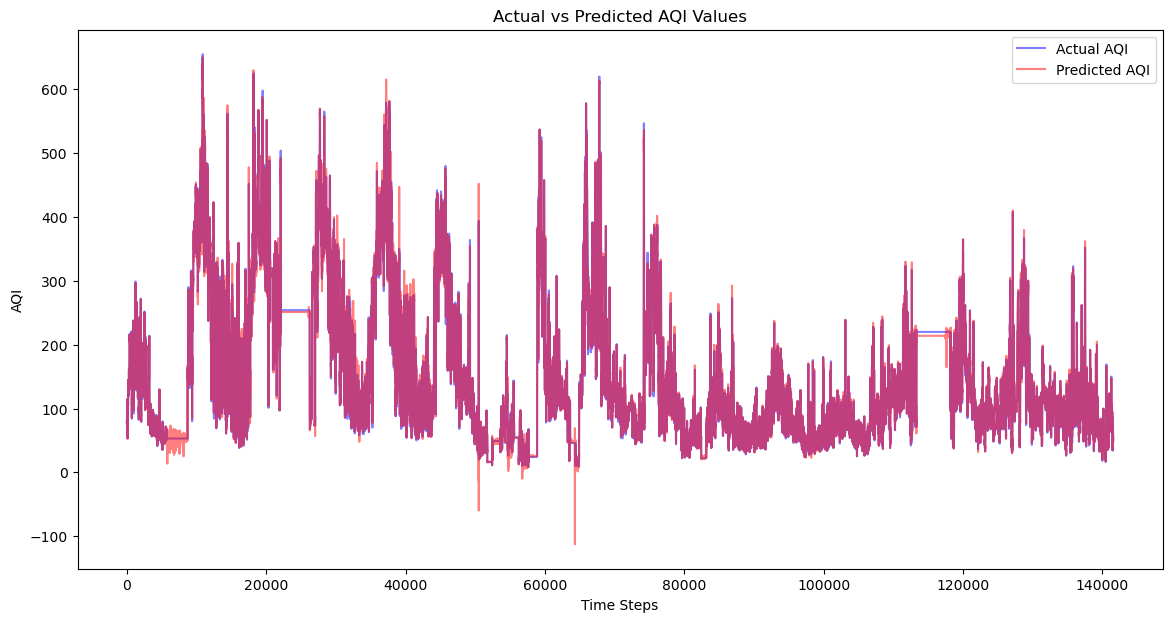

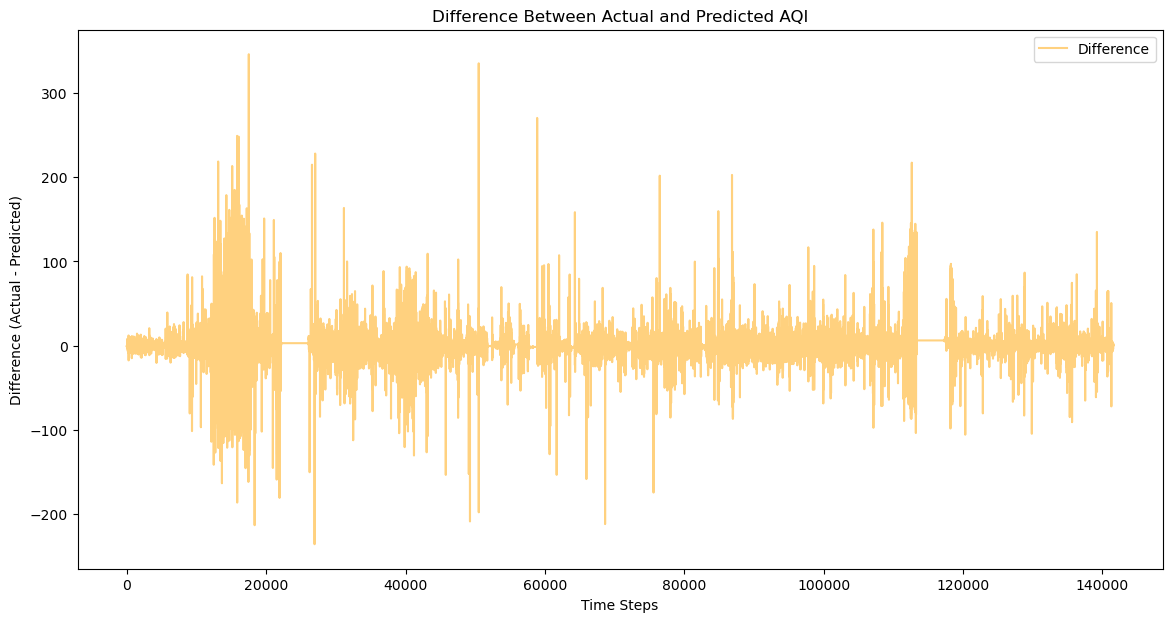

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(y_test_unscaled, label='Actual AQI', color='blue', alpha=0.5)
plt.plot(predictions_unscaled, label='Predicted AQI', color='red', alpha=0.5)
plt.title('Actual vs Predicted AQI Values')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(y_test_unscaled - predictions_unscaled, label='Difference', color='orange', alpha=0.5)
plt.title('Difference Between Actual and Predicted AQI')
plt.xlabel('Time Steps')
plt.ylabel('Difference (Actual - Predicted)')
plt.legend()
plt.show()


In [15]:
from sklearn.metrics import f1_score
import numpy as np

def get_aqi_category(aqi):
    if aqi <= 50:
        return 0  
    elif aqi <= 100:
        return 1  
    elif aqi <= 150:
        return 2  
    elif aqi <= 200:
        return 3 
    elif aqi <= 300:
        return 4  
    else:
        return 5 

y_test_categories = np.array([get_aqi_category(aqi) for aqi in y_test_unscaled.flatten()])
predictions_categories = np.array([get_aqi_category(aqi) for aqi in predictions_unscaled.flatten()])

# Calculate F1 Score
f1 = f1_score(y_test_categories, predictions_categories, average='weighted')
print(f'F1 Score: {f1}')


F1 Score: 0.9392921539494767


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)

mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
mse_scaled = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse_scaled = np.sqrt(mean_squared_error(y_test, predictions))
mape = mean_absolute_percentage_error(y_test_unscaled, predictions_unscaled)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Scaled Mean Squared Error (MSE): {mse_scaled}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Scaled Root Mean Squared Error (MSE): {rmse_scaled}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

f1 = f1_score(y_test_categories, predictions_categories, average='weighted')
print(f"F1 Score: {f1}")


NameError: name 'y_test_unscaled' is not defined

In [17]:
#Bi-LSTM

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
import numpy as np

def create_sequences(data, time_steps=24):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i + time_steps])
        labels.append(data[i + time_steps][-1])  
    return np.array(sequences), np.array(labels)

X, y = create_sequences(df_scaled.values, time_steps=24)

train_size = int(0.8 * len(X))
X_train_biLSTM, X_test_biLSTM = X[:train_size], X[train_size:]
y_train_biLSTM, y_test_biLSTM = y[:train_size], y[train_size:]

model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train_biLSTM.shape[1], X_train_biLSTM.shape[2])))
model.add(Dropout(0.2))  
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu')) 
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, batch_size=64, epochs=75)
predictions_biLSTM = model.predict(X_test_biLSTM)

scaler_aqi = MinMaxScaler()
scaler_aqi.fit(df_cleaned[['AQI']])  
predictions_unscaled = scaler_aqi.inverse_transform(predictions_biLSTM)
y_test_unscaled = scaler_aqi.inverse_transform(y_test.reshape(-1, 1))

print("Predictions (unscaled):", predictions_unscaled[:5])
print("Actual AQI values (unscaled):", y_test_unscaled[:5])


Epoch 1/75
8849/8849 [==============================] - 217s 23ms/step - loss: 2.0261e-04
Epoch 2/75
8849/8849 [==============================] - 203s 23ms/step - loss: 1.2776e-04
Epoch 3/75
8849/8849 [==============================] - 200s 23ms/step - loss: 1.1223e-04
Epoch 4/75
8849/8849 [==============================] - 199s 23ms/step - loss: 1.0660e-04
Epoch 5/75
8849/8849 [==============================] - 200s 23ms/step - loss: 1.0034e-04
Epoch 6/75
8849/8849 [==============================] - 206s 23ms/step - loss: 9.6241e-05
Epoch 7/75
8849/8849 [==============================] - 204s 23ms/step - loss: 9.4132e-05
Epoch 8/75
8849/8849 [==============================] - 203s 23ms/step - loss: 8.9627e-05
Epoch 9/75
8849/8849 [==============================] - 203s 23ms/step - loss: 8.9146e-05
Epoch 10/75
8849/8849 [==============================] - 202s 23ms/step - loss: 8.5644e-05
Epoch 11/75
8849/8849 [==============================] - 203s 23ms/step - loss: 8.3321e-05
Epoch 12

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

mse = mean_squared_error(y_test_biLSTM, predictions_biLSTM)
print(f"Mean Squared Error (MSE): {mse}")

mae = mean_absolute_error(y_test_biLSTM, predictions_biLSTM)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

r2 = r2_score(y_test_biLSTM, predictions_biLSTM)
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 1.0875252066991713e-05
Mean Absolute Error (MAE): 0.0019746117184234247
Root Mean Squared Error (RMSE): 0.003297764707645425
R-squared (R²): 0.9910241148528499


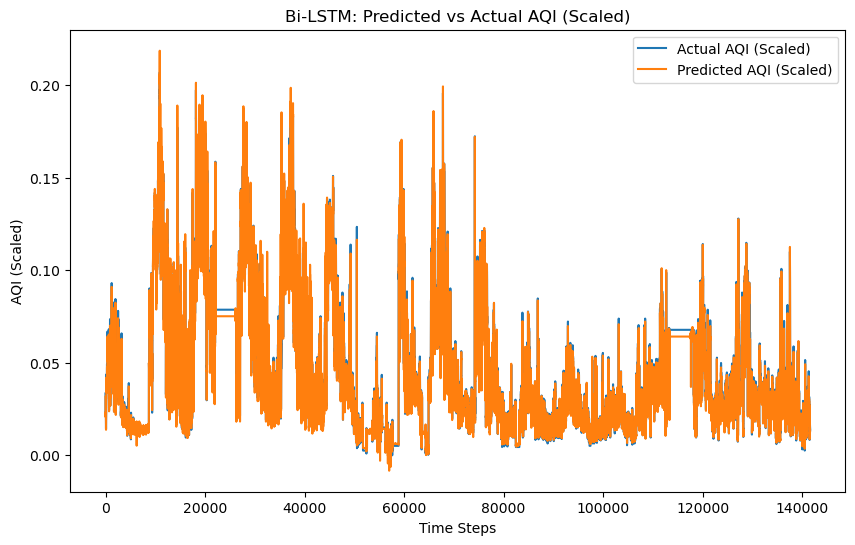

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_biLSTM, label='Actual AQI (Scaled)')
plt.plot(predictions_biLSTM, label='Predicted AQI (Scaled)')
plt.title('Bi-LSTM: Predicted vs Actual AQI (Scaled)')
plt.xlabel('Time Steps')
plt.ylabel('AQI (Scaled)')
plt.legend()
plt.show()


In [10]:
#LSTM + BI-LSTM + LSTM

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, BatchNormalization
import numpy as np
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

df_cleaned = df_cleaned.fillna(df_cleaned.median()) 
features = df_cleaned.drop(columns=['AQI']).values
target = df_cleaned['AQI'].values

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.reshape(-1, 1))

def create_sequences(data, labels, time_steps=24):
    sequences, targets = [], []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i + time_steps])
        targets.append(labels[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 24
X_LBL, y_LBL = create_sequences(X_scaled, y_scaled, time_steps)

train_size = int(0.8 * len(X_LBL))
X_train_LBL, X_test_LBL = X_LBL[:train_size], X_LBL[train_size:]
y_train_LBL, y_test_LBL = y_LBL[:train_size], y_LBL[train_size:]

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_LBL.shape[1], X_train_LBL.shape[2])),
    BatchNormalization(),
    Dropout(0.1),
    
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.1),
    
    LSTM(64, return_sequences=False),
    Dropout(0.1),
    
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_LBL, y_train_LBL,
    epochs=100,  
    batch_size=64,
    validation_data=(X_test_LBL, y_test_LBL),
    verbose=1,
    callbacks=[lr_scheduler, early_stopping]
)

predictions_LBL = model.predict(X_test_LBL)

y_pred_inverse_LBL = scaler_y.inverse_transform(predictions_LBL)
y_test_inverse_LBL = scaler_y.inverse_transform(y_test_LBL.reshape(-1, 1))


Epoch 1/100
 782/8849 [=>............................] - ETA: 3:27 - loss: 0.0028

KeyboardInterrupt: 

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

mse = mean_squared_error(y_test_inverse_LBL, y_pred_inverse_LBL)
mae = mean_absolute_error(y_test_inverse_LBL, y_pred_inverse_LBL)
rmse = np.sqrt(mse)  
mape = mean_absolute_percentage_error(y_test_inverse_LBL, y_pred_inverse_LBL)
r2 = r2_score(y_test_inverse_LBL, y_pred_inverse_LBL)  

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 3331.146102494683
Mean Absolute Error (MAE): 47.022936829114684
Root Mean Squared Error (RMSE): 57.716081835955244
Mean Absolute Percentage Error (MAPE): 0.6924023430358687
R² Score: 0.7184655190376381


In [9]:
#GRU

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np

def create_sequences(data, time_steps=24):
    sequences = []
    labels = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:i + time_steps])
        labels.append(data[i + time_steps][-1])  
    return np.array(sequences), np.array(labels)

X, y = create_sequences(df_scaled.values, time_steps=24)

train_size = int(0.8 * len(X))
X_train_GRU, X_test_GRU = X[:train_size], X[train_size:]
y_train_GRU, y_test_GRU = y[:train_size], y[train_size:]

model = Sequential()

model.add(Bidirectional(GRU(50, return_sequences=True), input_shape=(X_train_GRU.shape[1], X_train_GRU.shape[2])))
model.add(Dropout(0.2)) 

model.add(Bidirectional(GRU(50, return_sequences=False)))
model.add(Dropout(0.2))

model.add(Dense(25, activation='relu'))  
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(X_train, y_train, batch_size=64, epochs=75, validation_data=(X_test_GRU, y_test_GRU), callbacks=[early_stopping])

predictions_GRU = model.predict(X_test_GRU)

rmse = np.sqrt(mean_squared_error(y_test_GRU, predictions_GRU))
print(f"GRU Root Mean Squared Error: {rmse}")
scaler_aqi = MinMaxScaler()
scaler_aqi.fit(df_cleaned[['AQI']]) 
predictions_unscaled = scaler_aqi.inverse_transform(predictions)
y_test_unscaled = scaler_aqi.inverse_transform(y_test.reshape(-1, 1))
print("Predictions (unscaled):", predictions_unscaled[:5])
print("Actual AQI values (unscaled):", y_test_unscaled[:5])


NameError: name 'X_train' is not defined

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions_unscaled))
print(f"GRU Root Mean Squared Error (RMSE): {rmse}")
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
print(f"GRU Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test_unscaled, predictions_unscaled)
print(f"GRU Mean Squared Error (MSE): {mse}")
r2 = r2_score(y_test_unscaled, predictions_unscaled)
print(f"GRU R-squared (R²): {r2}")


GRU Root Mean Squared Error (RMSE): 8.82111942422419
GRU Mean Absolute Error (MAE): 3.9570743664471295
GRU Mean Squared Error (MSE): 77.8121478964253
GRU R-squared (R²): 0.9934236439962267


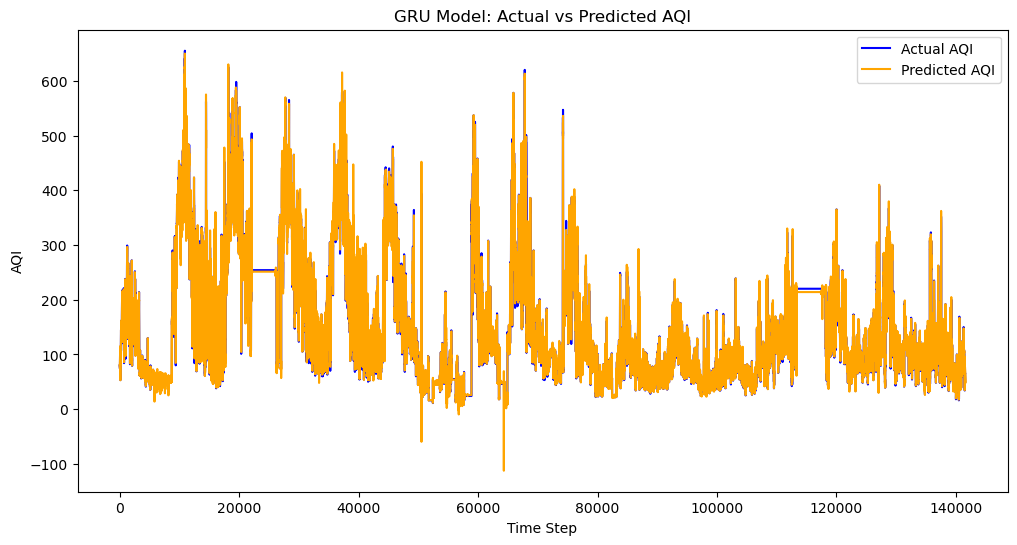

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(y_test_unscaled, label='Actual AQI', color='blue')
plt.plot(predictions_unscaled, label='Predicted AQI', color='orange')
plt.title('GRU Model: Actual vs Predicted AQI')
plt.xlabel('Time Step')
plt.ylabel('AQI')
plt.legend()
plt.show()
